In [1]:
!pip install konlpy transformers sentencepiece

import nltk
from konlpy.tag import Okt
from transformers import pipeline
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')


# 텍스트 예시 (작품 내용)
text = """
대한민국의 아름다운 자연과 사람들의 삶을 노래하는 시입니다.
푸른 산과 맑은 강물, 그리고 따뜻한 인정이 가득한 마을을 그려냅니다.
하지만, 빠르게 변화하는 세상 속에서 자연과 사람들의 조화가 깨지고 있는 모습도 보여줍니다.
우리는 과연 이 아름다움을 지켜낼 수 있을까요?
"""

# 1. 주제어 추출 (Keyword Extraction)
okt = Okt()
nouns = okt.nouns(text)
print("주요 명사:", nouns)

# 2. 감정 분석 (Sentiment Analysis)
classifier = pipeline("sentiment-analysis", model="snunlp/KR-FinBert") # 한국어 감정 분석 모델 사용
result = classifier(text)
print("감정 분석 결과:", result)

# 3. 문체 분석 (Stylistic Analysis)
# 문장 분리
sentences = nltk.sent_tokenize(text)

# 각 문장의 길이 계산
sentence_lengths = [len(sentence) for sentence in sentences]
print("문장 길이:", sentence_lengths)

# 어휘 다양성 계산 (전체 단어 개수 대비 고유 단어 개수 비율)
words = okt.morphs(text)
vocabulary_size = len(set(words))
word_count = len(words)
lexical_diversity = vocabulary_size / word_count if word_count > 0 else 0
print("어휘 다양성:", lexical_diversity)

# 어미 분석
pos_tags = okt.pos(text)
eomi_counts = Counter([word for word, tag in pos_tags if tag.startswith('E')]) # 어미 태그로 시작하는 단어 추출
print("어미 빈도:", eomi_counts)

# 조사 분석
josa_counts = Counter([word for word, tag in pos_tags if tag.startswith('J')])
print("조사 빈도:", josa_counts)

# 문장의 평균 길이 계산
average_sentence_length = sum(sentence_lengths) / len(sentence_lengths) if len(sentence_lengths) > 0 else 0
print("평균 문장 길이:", average_sentence_length)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 14.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


주요 명사: ['대한민국', '자연', '사람', '삶', '노래', '시', '푸른', '산', '맑은', '강물', '인정이', '마을', '변화', '세상', '속', '자연', '사람', '조화', '모습', '우리', '과연', '이', '움', '낼', '수']


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/406M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at snunlp/KR-FinBert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/336 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/143k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/294k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


감정 분석 결과: [{'label': 'LABEL_0', 'score': 0.6431193351745605}]
문장 길이: [34, 39, 51, 26]
어휘 다양성: 0.75
어미 빈도: Counter()
조사 빈도: Counter({'의': 3, '과': 3, '을': 3, '에서': 1, '가': 1, '도': 1, '는': 1})
평균 문장 길이: 37.5


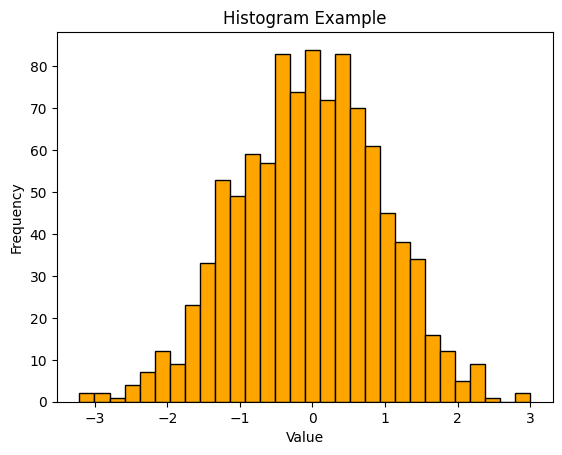

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
data = np.random.randn(1000)

# 히스토그램 생성
plt.hist(data, bins=30, color='orange', edgecolor='black')

# 그래프 꾸미기
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


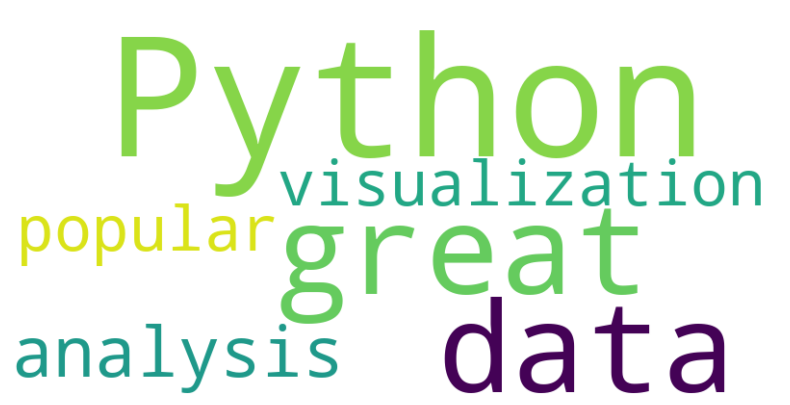

In [ ]:
# 라이브러리 import
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 텍스트 데이터 (예시), 다양하게 변경 가능
text = "Python is great for data analysis and visualization. Python is popular."

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# width, height: 가로크기, 세로 크기, background_color: 배경색

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))

# 픽셀의 자연스러운 표현을 위해 보간법(interpolation)을 선택, bilinear가 보편적방법
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.0 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

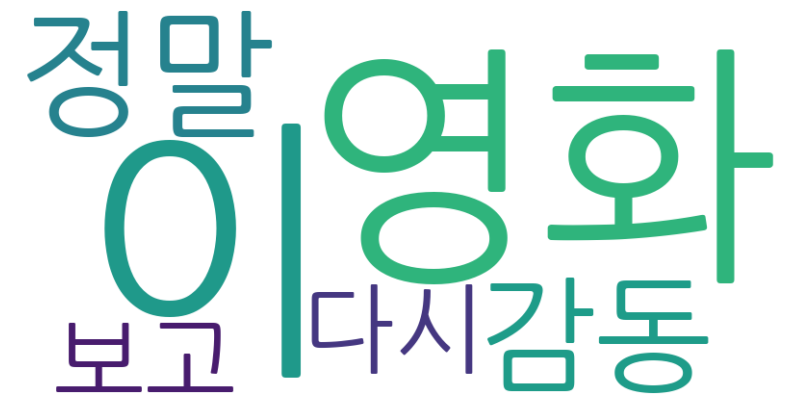

In [ ]:
!pip install konlpy wordcloud
!apt-get install -y fonts-nanum
!fc-cache -fv

from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt

# 한글 텍스트

text = "이 영화는 정말 재미있고 감동적이었습니다. 다시 보고 싶어요."
# 형태소 분석 및 단어 추출
okt = Okt()
tokens = okt.nouns(text)  # 명사 추출
processed_text = " ".join(tokens)

# 워드 클라우드 생성
# 한글은 폰트를 설정해야 함
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
  width=800,height=400, background_color='white').generate(processed_text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서 집합
documents = [
    "이 영화는 정말 재미있다",
    "이 영화는 감동적이다",
    "영화는 재미있고 감동적이다"
]

# TF-IDF 계산
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# 단어와 TF-IDF 값 출력
print(vectorizer.get_feature_names_out())
print(tfidf_matrix.toarray())


['감동적이다' '영화는' '재미있고' '재미있다' '정말']
[[0.         0.38537163 0.         0.65249088 0.65249088]
 [0.78980693 0.61335554 0.         0.         0.        ]
 [0.54783215 0.42544054 0.72033345 0.         0.        ]]
